In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
import numpy as np
from scipy.signal import savgol_coeffs

# Window length (odd), polynomial order
window_length = 101
polyorder = 3

# Compute coefficients for the central point
coeffs = savgol_coeffs(window_length, polyorder, deriv=0, use='conv')
print(coeffs)

[-0.01413054 -0.01268865 -0.01127588 -0.00989225 -0.00853775 -0.00721237
 -0.00591613 -0.00464901 -0.00341102 -0.00220216 -0.00102243  0.00012817
  0.00124964  0.00234198  0.00340519  0.00443928  0.00544423  0.00642006
  0.00736676  0.00828432  0.00917276  0.01003207  0.01086225  0.0116633
  0.01243522  0.01317802  0.01389168  0.01457621  0.01523162  0.0158579
  0.01645504  0.01702306  0.01756195  0.01807171  0.01855234  0.01900384
  0.01942621  0.01981946  0.02018357  0.02051856  0.02082441  0.02110114
  0.02134874  0.02156721  0.02175654  0.02191675  0.02204784  0.02214979
  0.02222261  0.0222663   0.02228087  0.0222663   0.02222261  0.02214979
  0.02204784  0.02191675  0.02175654  0.02156721  0.02134874  0.02110114
  0.02082441  0.02051856  0.02018357  0.01981946  0.01942621  0.01900384
  0.01855234  0.01807171  0.01756195  0.01702306  0.01645504  0.0158579
  0.01523162  0.01457621  0.01389168  0.01317802  0.01243522  0.0116633
  0.01086225  0.01003207  0.00917276  0.00828432  0.007

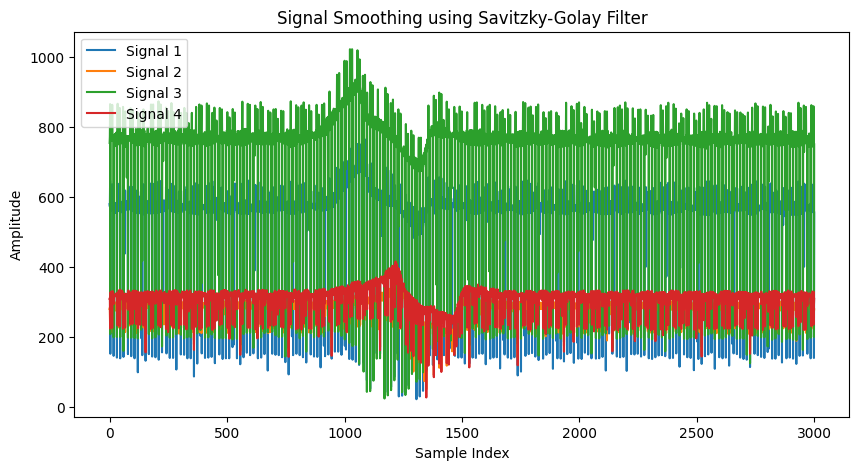

In [ ]:
example_signal = np.load("data_00002.npy")

plt.figure(figsize=(10, 5))
for i in range(example_signal.shape[1]):
    plt.plot(example_signal[:, i], label=f'Signal {i+1}')
    # filtered_i = savgol_filter(example_signal[:, i], window_length=101, polyorder=3, mode='interp')
    # # Minmax filtering
    # min_val = np.min(filtered_i)
    # max_val = np.max(filtered_i)
    # filtered_i = (filtered_i - min_val) / (max_val - min_val)
    # plt.plot(filtered_i, label=f'Filtered Signal {i+1}')
plt.title('Signal Smoothing using Savitzky-Golay Filter')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [4]:
data = np.load("preprocessed_data/left_to_right/data_00002.npy")

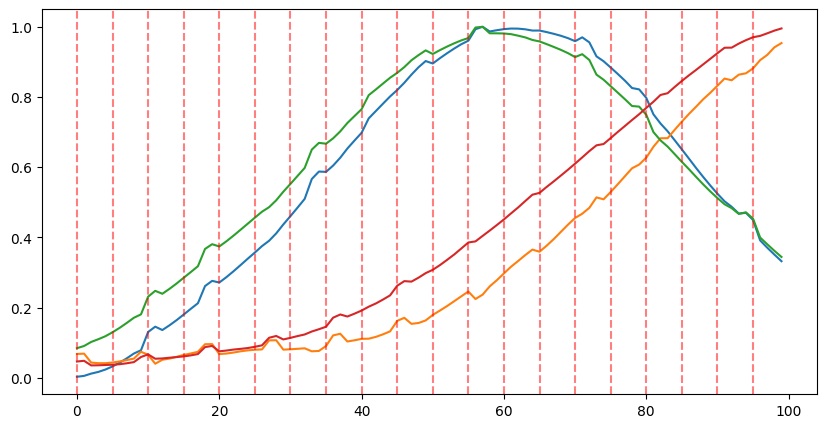

In [15]:
plt.figure(figsize=(10, 5))
for i in range(data.shape[1]):
    filtered_i = data[100:200, i]
    plt.plot(filtered_i, label=f'Filtered Signal {i+1}')
# Add frame borders every 5 entries
for j in range(0, len(filtered_i), 5):
    plt.axvline(x=j, color='red', linestyle='--', alpha=0.5)

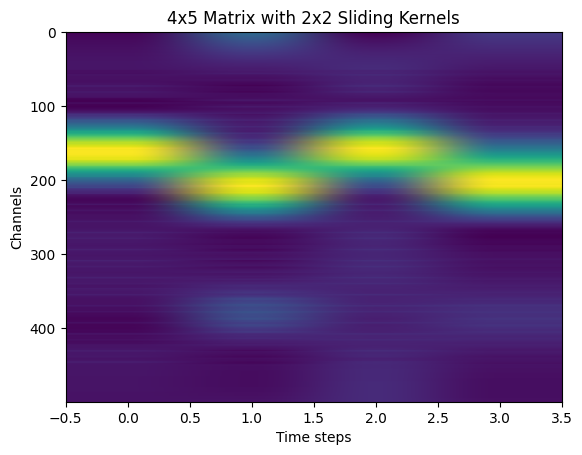

In [22]:

import matplotlib.patches as patches

one_frame = data[140:145]

plt.imshow(data, aspect='auto', cmap='viridis', origin='upper')

# Draw 2x2 kernels (stride 1, no padding)
kernel_size = (2, 2)
rows, cols = data.shape

for i in range(rows - kernel_size[0] + 1):
    for j in range(cols - kernel_size[1] + 1):
        # rect = patches.Rectangle(
        #     (j-0.5, i-0.5),   # bottom-left corner (shift by 0.5 to align with imshow grid)
        #     kernel_size[1],    # width
        #     kernel_size[0],    # height
        #     linewidth=2,
        #     edgecolor='red',
        #     facecolor='none'
        # )
        # plt.gca().add_patch(rect)
        pass

plt.title("4x5 Matrix with 2x2 Sliding Kernels")
plt.xlabel("Time steps")
plt.ylabel("Channels")
plt.show()

AttributeError: 'Figure' object has no attribute 'grid'

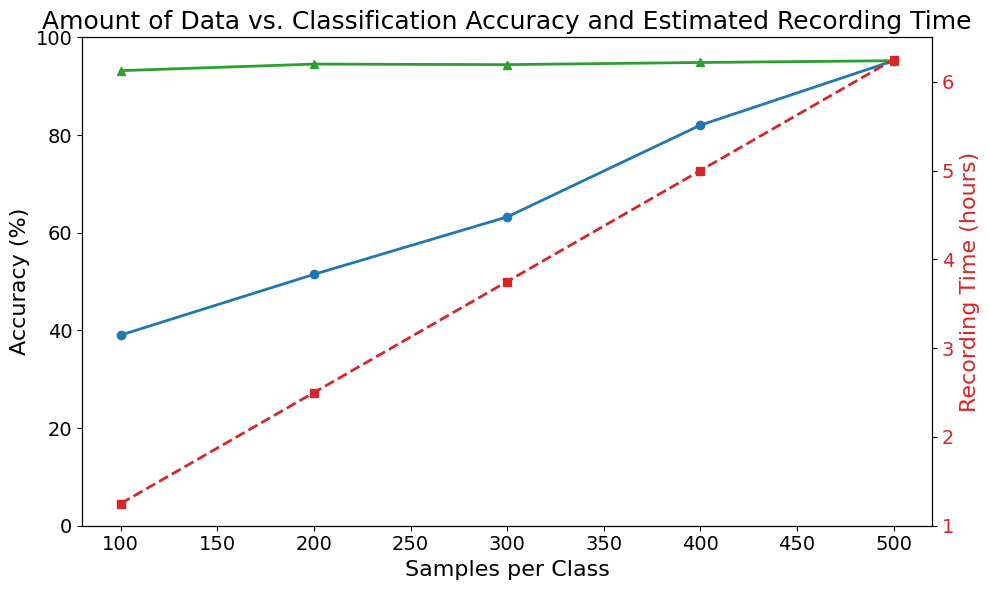

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
samples = np.array([100, 200, 300, 400, 500])
accuracy1 = np.array([39.04, 51.47, 63.23, 82.02, 95.21])
accuracy2 = np.array([93.18, 94.52, 94.41, 94.85, 95.21])

# Time in seconds (at least 3 seconds per 2-second gesture for all 10 classes)
time_seconds = 5 * 9 * samples

# Convert to hours
time_hours = time_seconds / 3600  # seconds → hours

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Accuracy
color1 = 'tab:blue'
ax1.set_xlabel('Samples per Class', fontsize=16)
ax1.set_ylabel('Accuracy (%)', fontsize=16)
ax1.plot(samples, accuracy1, color=color1, marker='o', linewidth=2, label='Accuracy without augmentation')
ax1.plot(samples, accuracy2, color='tab:green', marker='^', linewidth=2, label='Accuracy with augmentation to 500 samples')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.set_ylim(0, 100)

# Right Y-axis: Time in hours
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Recording Time (hours)', color=color2, fontsize=16)
ax2.plot(samples, time_hours, color=color2, linestyle='--', marker='s', linewidth=2, label='Time')
ax2.tick_params(axis='y', labelcolor=color2, labelsize=14)

# Title, grid, and legend
plt.title("Amount of Data vs. Classification Accuracy and Estimated Recording Time", fontsize=18)
fig.tight_layout()
fig.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85), fontsize=14)  # Combine legends
plt.show()


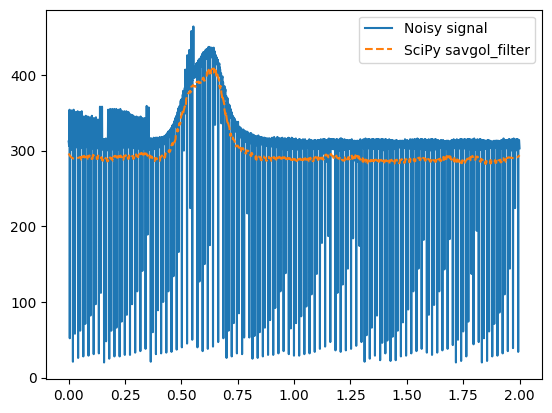

In [ ]:
import numpy as np

class MovingMeanFilter:
    def __init__(self, window_size=101):
        if window_size % 2 == 0:
            raise ValueError("window_size must be odd")
        self.window_size = window_size
        self.half_window = window_size // 2
        self.kernel = np.ones(window_size) / window_size

    def apply(self, x):
        """Apply moving mean filter to full array x (1D)."""
        # Pad edges by reflection (like mode='interp')
        x_padded = np.pad(x, (self.half_window, self.half_window), mode='reflect')
        # Convolve with kernel
        y = np.convolve(x_padded, self.kernel, mode='valid')
        return y

# =========================
# Example usage
# =========================
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Noisy signal
    t = np.linspace(0, 2, 2000)
    signal = np.load("dataset/data/left_to_right/data_00001.npy")[:, 0]  # Use first channel

    # Apply moving mean filter
    mm_filter = MovingMeanFilter(window_size=101)
    smoothed_signal = mm_filter.apply(signal)

    plt.plot(t, signal, label="Noisy signal")
    plt.plot(t, smoothed_signal, label="Moving mean filter", linestyle='--')
    plt.legend()
    plt.show()
